In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def filter_csv_by_date(csv_file, start_date, end_date, date_column='date', value_column='predict'):
    df = pd.read_csv(csv_file, sep=';')
    df[date_column] = pd.to_datetime(df[date_column])
    mask = (df[date_column] >= start_date) & (df[date_column] <= end_date)
    filtered_df = df.loc[mask]
    return filtered_df[date_column], filtered_df[value_column]

In [6]:
realcsv = pd.read_csv('data/real-1mei.csv', sep=';')
predictcsv = pd.read_csv('data/predict-1mei.csv', sep=';')

realData = realcsv['real']
predictData = predictcsv['predict']
date = pd.to_datetime(realcsv['date'])
predictDate = pd.to_datetime(predictcsv['date'])



In [7]:
# Initial date range
initial_start_train = datetime(2024, 1, 1)
initial_end_train = datetime(2024, 2, 21)
initial_start_test = datetime(2024, 2, 22)
initial_end_test = datetime(2024, 2, 28)

# Number of weeks to shift
num_weeks = 10  # Adjust this to change how many weeks you want to process

for week in range(num_weeks):
    # Calculate date ranges for this iteration
    startTrain = initial_start_train
    endTrain = initial_end_train + timedelta(weeks=week)
    startTest = initial_start_test + timedelta(weeks=week)
    endTest = initial_end_test + timedelta(weeks=week)

    plotName = f'RealvPredict Until {endTest.strftime("%Y-%m-%d")}.png'

    # Filter data
    trainDate, trainData = filter_csv_by_date('data/real-1mei.csv', startTrain, endTrain, value_column='real')
    testDate, testData = filter_csv_by_date('data/real-1mei.csv', startTest, endTest, value_column='real')
    predictDate, predictData = filter_csv_by_date('data/predict-1mei.csv', startTest, endTest)

    # Create plot
    plt.figure(figsize=(18, 5))
    plt.plot(trainDate, trainData, label='Pelatihan', linewidth=2)
    plt.plot(testDate, testData, label='Uji', linewidth=2, marker='x', markersize=8, color='green')
    plt.plot(predictDate, predictData, label='Prediksi', linewidth=3, linestyle='--', marker='.', markersize=10)
    plt.xlabel('Tanggal')
    plt.ylabel('Energi (Wh)')
    plt.legend(fontsize='xx-large', loc='lower left')
    plt.savefig(f'plot/{plotName}', bbox_inches='tight')
    plt.close()  # Close the plot to free up memory

    print(f"Processed week {week + 1}: {startTrain.date()} to {endTest.date()}")

print("All plots have been generated.")

Processed week 1: 2024-01-01 to 2024-02-28
Processed week 2: 2024-01-01 to 2024-03-06
Processed week 3: 2024-01-01 to 2024-03-13
Processed week 4: 2024-01-01 to 2024-03-20
Processed week 5: 2024-01-01 to 2024-03-27
Processed week 6: 2024-01-01 to 2024-04-03
Processed week 7: 2024-01-01 to 2024-04-10
Processed week 8: 2024-01-01 to 2024-04-17
Processed week 9: 2024-01-01 to 2024-04-24
Processed week 10: 2024-01-01 to 2024-05-01
All plots have been generated.


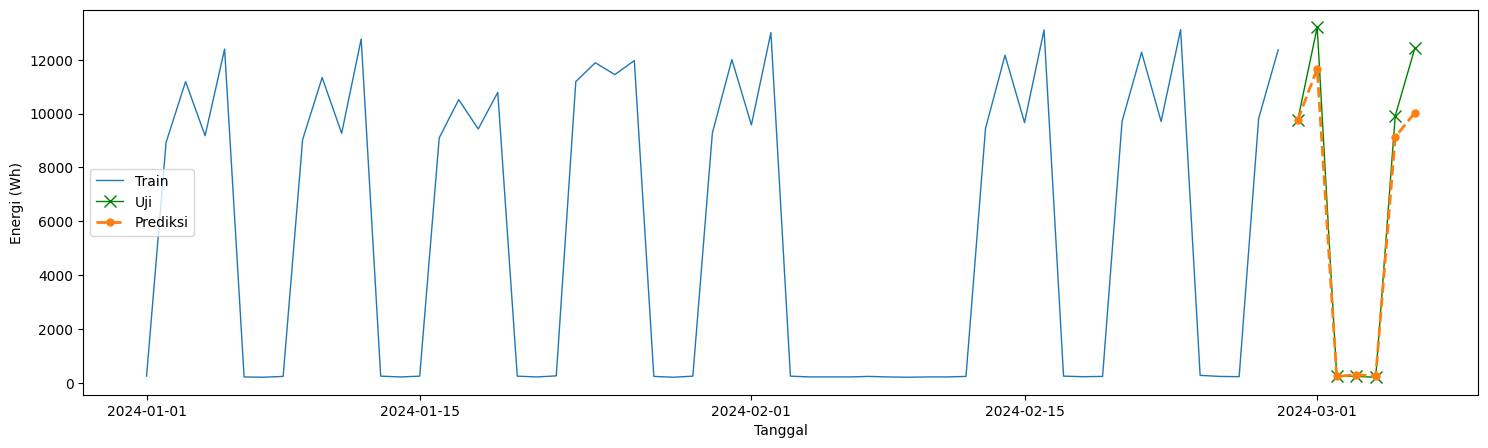

In [34]:
plt.figure(figsize=(18, 5))
plt.plot(trainDate, trainData, label='Train', linewidth=1)
plt.plot(testDate, testData, label='Uji', linewidth=1, marker='x', markersize=8, color='green')
plt.plot(predictDate, predictData, label='Prediksi', linewidth=2, linestyle='--', marker='.', markersize=10)
plt.xlabel('Tanggal')
plt.ylabel('Energi (Wh)')
plt.legend()
plt.savefig('plot/'+plotName, bbox_inches='tight')
plt.show()


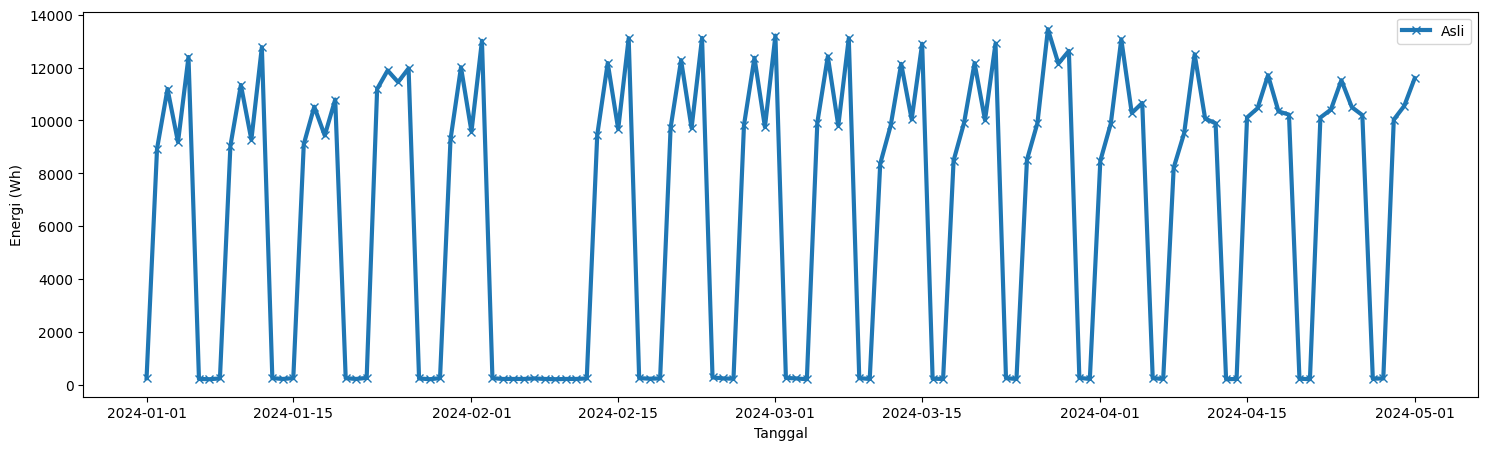

In [6]:
# Real Data Plot
plt.figure(figsize=(18, 5))
plt.plot(date, realData, label='Asli', linewidth=3, marker='x', markersize=6)
plt.xlabel('Tanggal')
plt.ylabel('Energi (Wh)')
plt.legend()
# plt.savefig('plot/Real.jpg', bbox_inches='tight')
plt.show()


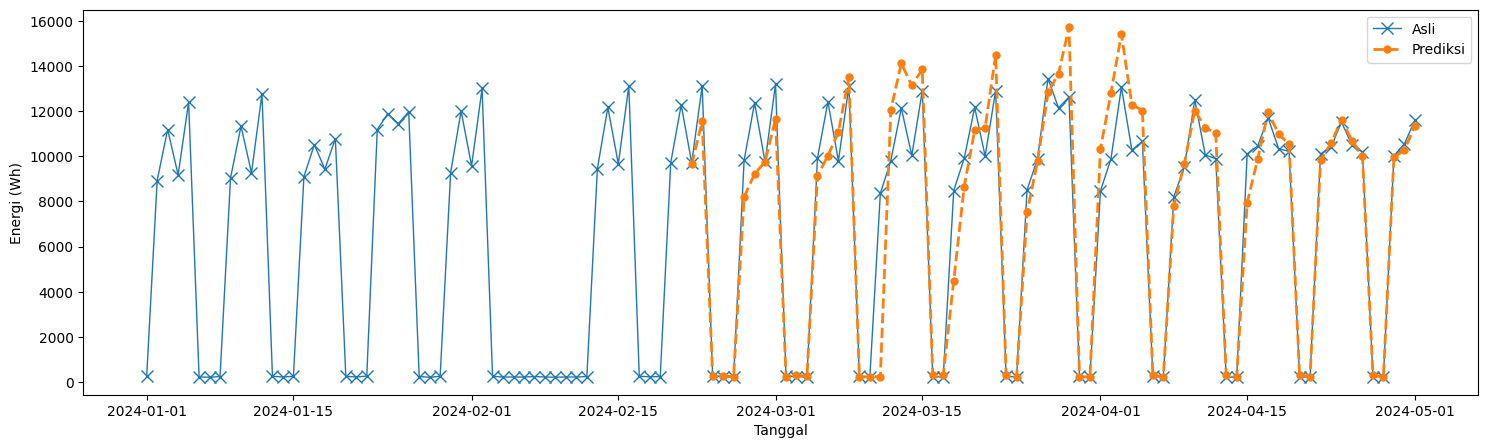

In [30]:
plt.figure(figsize=(18, 5))
plt.plot(date, realData, label='Asli', linewidth=1, marker='x', markersize=8)
plt.plot(predictDate, predictData, label='Prediksi', linewidth=2, linestyle='--', marker='.', markersize=10)
plt.xlabel('Tanggal')
plt.ylabel('Energi (Wh)')
plt.legend()
plt.savefig('plot/RealvsPredict.jpg', bbox_inches='tight')
plt.show()
